# Internal Lab 



# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [801]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
df=pd.read_csv("petrol.csv")
df.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [802]:
df.shape

(48, 5)

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax            48 non-null float64
income         48 non-null int64
highway        48 non-null int64
dl             48 non-null float64
consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [804]:
df.isnull().sum()

tax            0
income         0
highway        0
dl             0
consumption    0
dtype: int64

In [805]:
df.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [806]:
df.tail()

,tax,income,highway,dl,consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [807]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

tax               1.1250
income          839.7500
highway        4045.7500
dl                0.0655
consumption     123.2500
dtype: float64

In [808]:
min_cap=Q1-1.5*IQR
min_cap

tax               5.3125
income         2479.3750
highway       -2958.3750
dl                0.4315
consumption     324.6250
dtype: float64

In [809]:
max_cap=Q3 + 1.5 * IQR
max_cap

tax                9.8125
income          5838.3750
highway        13224.6250
dl                 0.6935
consumption      817.6250
dtype: float64

In [810]:
newdf=df[(df < max_cap) & (df > min_cap)]
newdf.dropna(inplace=True)
newdf

,tax,income,highway,dl,consumption
0,9.00,3571,1976.0,0.525,541.0
1,9.00,4092,1250.0,0.572,524.0
2,9.00,3865,1586.0,0.580,561.0
3,7.50,4870,2351.0,0.529,414.0
4,8.00,4399,431.0,0.544,410.0
6,8.00,5319,11868.0,0.451,344.0
7,8.00,5126,2138.0,0.553,467.0
8,8.00,4447,8577.0,0.529,464.0
9,7.00,4512,8507.0,0.552,498.0
10,8.00,4391,5939.0,0.530,580.0


In [811]:
newdf.shape

(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [812]:
corr=newdf.corr()
corr

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


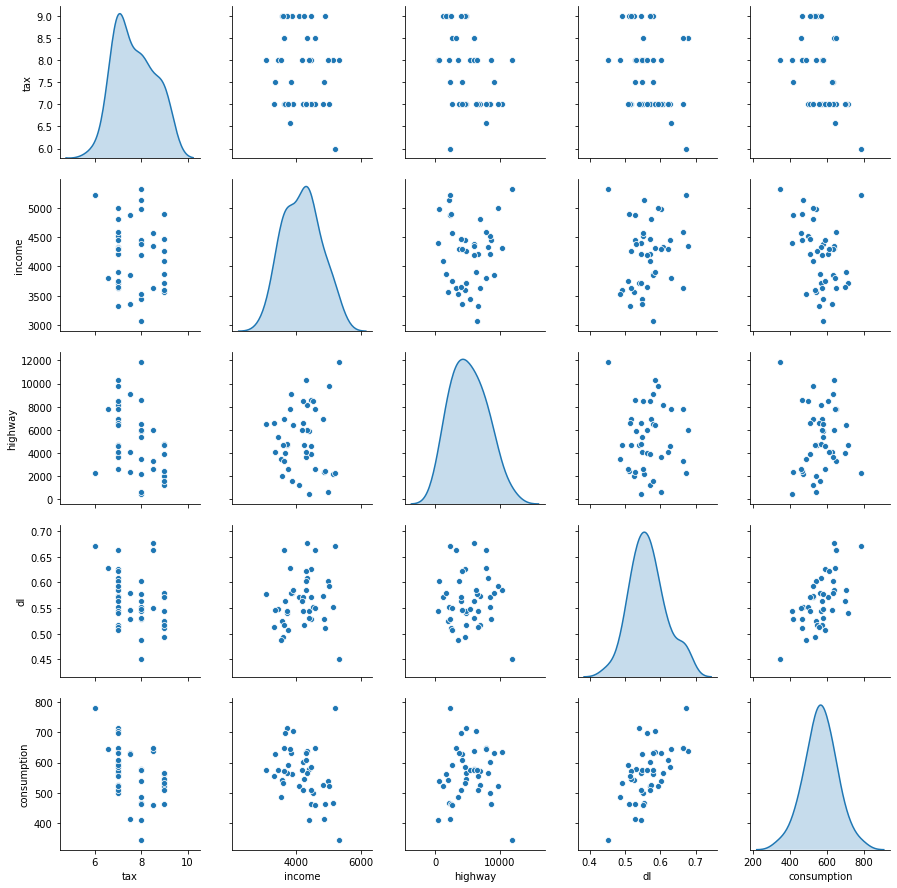

In [813]:
sns.pairplot(newdf,diag_kind='kde')

In [814]:
corr.iloc[-1]

tax           -0.446116
income        -0.347326
highway        0.034309
dl             0.611788
consumption    1.000000
Name: consumption, dtype: float64

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [815]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(newdf)
df_scaled=scaler.transform(newdf)
df_scaled

array([[1.        , 0.2251773 , 0.13508787, 0.32743363, 0.44977169],
       [1.        , 0.45611702, 0.07160969, 0.53539823, 0.4109589 ],
       [1.        , 0.35549645, 0.10098802, 0.57079646, 0.49543379],
       [0.5       , 0.80097518, 0.16787619, 0.34513274, 0.15981735],
       [0.66666667, 0.59219858, 0.        , 0.41150442, 0.15068493],
       [0.66666667, 1.        , 1.        , 0.        , 0.        ],
       [0.66666667, 0.91445035, 0.14925243, 0.45132743, 0.28082192],
       [0.66666667, 0.61347518, 0.71224972, 0.34513274, 0.2739726 ],
       [0.33333333, 0.64228723, 0.70612923, 0.44690265, 0.35159817],
       [0.66666667, 0.58865248, 0.48159482, 0.34955752, 0.53881279],
       [0.33333333, 0.77748227, 0.56824342, 0.54424779, 0.41324201],
       [0.33333333, 0.5070922 , 0.53764099, 0.4159292 , 0.37442922],
       [0.33333333, 0.5625    , 0.67570167, 0.69469027, 0.50684932],
       [0.33333333, 0.55629433, 0.86639853, 0.59734513, 0.66438356],
       [0.33333333, 0.50664894, 0.

In [816]:
newdf=pd.DataFrame(df_scaled,columns=newdf.columns)
newdf

,tax,income,highway,dl,consumption
0,1.000000,0.225177,0.135088,0.327434,0.449772
1,1.000000,0.456117,0.071610,0.535398,0.410959
2,1.000000,0.355496,0.100988,0.570796,0.495434
3,0.500000,0.800975,0.167876,0.345133,0.159817
4,0.666667,0.592199,0.000000,0.411504,0.150685
5,0.666667,1.000000,1.000000,0.000000,0.000000
6,0.666667,0.914450,0.149252,0.451327,0.280822
7,0.666667,0.613475,0.712250,0.345133,0.273973
8,0.333333,0.642287,0.706129,0.446903,0.351598
9,0.666667,0.588652,0.481595,0.349558,0.538813


In [817]:
Y=newdf['consumption']
Y

0     0.449772
1     0.410959
2     0.495434
3     0.159817
4     0.150685
5     0.000000
6     0.280822
7     0.273973
8     0.351598
9     0.538813
10    0.413242
11    0.374429
12    0.506849
13    0.664384
14    0.591324
15    0.844749
16    0.675799
17    0.696347
18    0.447489
19    0.273973
20    0.463470
21    0.264840
22    0.506849
23    0.531963
24    0.655251
25    0.525114
26    0.433790
27    0.518265
28    0.479452
29    0.531963
30    0.648402
31    0.326484
32    0.684932
33    0.821918
34    0.694064
35    0.554795
36    0.810502
37    0.657534
38    0.563927
39    1.000000
40    0.378995
41    0.607306
42    0.410959
Name: consumption, dtype: float64

In [818]:
X=newdf.drop(columns=['consumption','highway','income'])
X

,tax,dl
0,1.000000,0.327434
1,1.000000,0.535398
2,1.000000,0.570796
3,0.500000,0.345133
4,0.666667,0.411504
5,0.666667,0.000000
6,0.666667,0.451327
7,0.666667,0.345133
8,0.333333,0.446903
9,0.666667,0.349558


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [819]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,train_size=0.8,test_size=0.2,shuffle=True)

In [820]:
X_test.shape

(9, 2)

In [821]:
X_train.shape

(34, 2)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [822]:
from sklearn.linear_model import LinearRegression
linearRegression=LinearRegression()
linearRegression.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [823]:
pred=linearRegression.predict(X_test)
pred

array([0.55035162, 0.52721946, 0.34392578, 0.760644  , 0.43023048,
       0.71571269, 0.46606501, 0.66575794, 0.44066027])

In [824]:
modeldf=pd.DataFrame()
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearRegression.coef_[idx]))
    modeldf[col_name]=[linearRegression.coef_[idx]]
modeldf=modeldf.rename(index={0: 'coefficient'})
modeldf

The coefficient for tax is -0.18977211217099585
The coefficient for dl is 0.4752607724911812


,tax,dl
coefficient,-0.189772,0.475261


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [825]:
linearRegression.score(X_test, y_test)

0.4796000198469271

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [826]:
Y=newdf['consumption']
Y

0     0.449772
1     0.410959
2     0.495434
3     0.159817
4     0.150685
5     0.000000
6     0.280822
7     0.273973
8     0.351598
9     0.538813
10    0.413242
11    0.374429
12    0.506849
13    0.664384
14    0.591324
15    0.844749
16    0.675799
17    0.696347
18    0.447489
19    0.273973
20    0.463470
21    0.264840
22    0.506849
23    0.531963
24    0.655251
25    0.525114
26    0.433790
27    0.518265
28    0.479452
29    0.531963
30    0.648402
31    0.326484
32    0.684932
33    0.821918
34    0.694064
35    0.554795
36    0.810502
37    0.657534
38    0.563927
39    1.000000
40    0.378995
41    0.607306
42    0.410959
Name: consumption, dtype: float64

In [827]:
X=newdf.drop(columns=['consumption'])
X

,tax,income,highway,dl
0,1.000000,0.225177,0.135088,0.327434
1,1.000000,0.456117,0.071610,0.535398
2,1.000000,0.355496,0.100988,0.570796
3,0.500000,0.800975,0.167876,0.345133
4,0.666667,0.592199,0.000000,0.411504
5,0.666667,1.000000,1.000000,0.000000
6,0.666667,0.914450,0.149252,0.451327
7,0.666667,0.613475,0.712250,0.345133
8,0.333333,0.642287,0.706129,0.446903
9,0.666667,0.588652,0.481595,0.349558


In [828]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y,train_size=0.8,test_size=0.2,shuffle=True)

In [829]:
linearRegression=LinearRegression()
linearRegression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [830]:
modeldf=pd.DataFrame()
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearRegression.coef_[idx]))
    modeldf[col_name]=[linearRegression.coef_[idx]]
modeldf=modeldf.rename(index={0: 'coefficient'})
modeldf

The coefficient for tax is -0.2638023332608414
The coefficient for income is -0.36595050551810593
The coefficient for highway is -0.06060031452898539
The coefficient for dl is 0.4794979006356536


,tax,income,highway,dl
coefficient,-0.263802,-0.365951,-0.0606,0.479498


In [831]:
linearRegression.score(X_test, y_test)

0.5329634202152385

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

R2 tells us how much the variation of the target can be explained by taking into account the features. In other words,it tells us to what extent the selected feature explains the target

In the above case, the features selected can explain 0.53 or 53% of the variation in Target.